In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
config = {
            "font.family": 'serif',
            "font.size": 14,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
plt.rc('axes', axisbelow=True)#将网格线置于底层
plt.rcParams.update(config)
#其他字体14，图例10

## 不同站点出行时间特征 

In [190]:
import geopandas as gpd
from shapely.geometry import Point,LineString,Polygon

In [2]:
df=pd.read_csv(r'C:\Users\飘哥\Desktop\通勤数据\分析数据\6月5日OD.csv')
#计算每条路线的总时间
df['stime']=df.常态值*df.time
df

,hour,FSTR_ONAME,FSTR_DNAME,实际值,常态值,变化量,dist,time,Ocat,Oloc,Dcat,Dloc,rainvalue,stime
0,6,七宝,上海南站,2,4.00,-2.00,15.373,43.133333,混合区,郊区,混合区,中外环,10.51,172.533333
1,7,七宝,上海南站,12,9.75,2.25,15.373,43.133333,混合区,郊区,混合区,中外环,7.79,420.550000
2,8,七宝,上海南站,15,12.25,2.75,15.373,43.133333,混合区,郊区,混合区,中外环,0.14,528.383333
3,9,七宝,上海南站,8,3.00,5.00,15.373,43.133333,混合区,郊区,混合区,中外环,0.18,129.400000
4,10,七宝,上海南站,1,5.92,-4.92,15.373,43.133333,混合区,郊区,混合区,中外环,2.46,255.349333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,20,真如,上南路,1,1.00,0.00,17.234,39.916667,混合区,中外环,居住区,中外环,0.00,39.916667
545511,20,紫藤路,杨高北路,1,1.00,0.00,30.433,71.200000,混合区,中外环,居住区,中外环,0.00,71.200000
545512,20,龙阳路,东川路,1,1.00,0.00,38.862,78.933333,混合区,中外环,混合区,郊区,0.00,78.933333
545513,21,新闸路,李子园,1,1.00,0.00,11.345,35.200000,工作区,内环,混合区,中外环,0.00,35.200000


In [192]:
df2=df.groupby('FSTR_ONAME').sum()[['常态值','stime']].reset_index()
df2['平均时间']=df2.stime/df2.常态值
df2=df2.drop(['常态值','stime'],axis=1)
df2.head()

,FSTR_ONAME,平均时间
0,七宝,29.524507
1,七莘路,41.214519
2,三林,35.985449
3,三林东,38.813827
4,三门路,43.182437


In [193]:
#加上坐标进行可视化
location=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站经纬度.csv',usecols=['name','lat','lng'],encoding='gb2312')
df2.columns=['name','time']
data=pd.merge(df2,location,on='name',how='left')
data

,name,time,lat,lng
0,七宝,29.524507,31.157307,121.344973
1,七莘路,41.214519,31.133770,121.358530
2,三林,35.985449,31.145129,121.507225
3,三林东,38.813827,31.148613,121.518794
4,三门路,43.182437,31.315271,121.504041
...,...,...,...,...
315,龙柏新村,42.833472,31.179500,121.365743
316,龙溪路,29.158231,31.196275,121.375518
317,龙漕路,30.292479,31.171743,121.439443
318,龙耀路,33.463855,31.161737,121.455199


In [194]:
data['geometry']=[Point(x) for x in zip (data.lng,data.lat)]
data

,name,time,lat,lng,geometry
0,七宝,29.524507,31.157307,121.344973,POINT (121.3449735 31.15730727)
1,七莘路,41.214519,31.133770,121.358530,POINT (121.3585299 31.13377025)
2,三林,35.985449,31.145129,121.507225,POINT (121.5072252 31.14512925)
3,三林东,38.813827,31.148613,121.518794,POINT (121.5187943 31.14861281)
4,三门路,43.182437,31.315271,121.504041,POINT (121.5040409 31.31527135)
...,...,...,...,...,...
315,龙柏新村,42.833472,31.179500,121.365743,POINT (121.3657433 31.17949957)
316,龙溪路,29.158231,31.196275,121.375518,POINT (121.375518 31.19627535)
317,龙漕路,30.292479,31.171743,121.439443,POINT (121.4394431 31.17174256)
318,龙耀路,33.463855,31.161737,121.455199,POINT (121.4551993 31.16173747)


In [107]:
data.time.describe()

count    320.000000
mean      35.854719
std        6.248567
min       20.302684
25%       31.618328
50%       34.118037
75%       39.558878
max       68.258835
Name: time, dtype: float64

<AxesSubplot:>

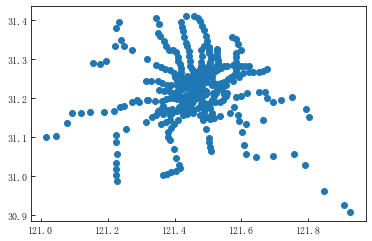

In [195]:
data_point=gpd.GeoDataFrame(data)
data_point=data_point.set_crs('EPSG:4326')
data_point.plot()

In [196]:
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
sh=gpd.read_file(r'C:\Users\飘哥\Desktop\上海行政区\SH_wgs.shp',encoding='utf-8')
nei=gpd.read_file(r'C:\Users\飘哥\Desktop\OD数据研究\图层\内环.shp',encoding='utf-8')
zhong=gpd.read_file(r'C:\Users\飘哥\Desktop\OD数据研究\图层\中环.shp',encoding='utf-8')
wai=gpd.read_file(r'C:\Users\飘哥\Desktop\OD数据研究\图层\中心城区.shp',encoding='utf-8')
nei=nei.to_crs('EPSG:4326')
zhong=zhong.to_crs('EPSG:4326')
wai=wai.to_crs('EPSG:4326')
point=data_point.copy()

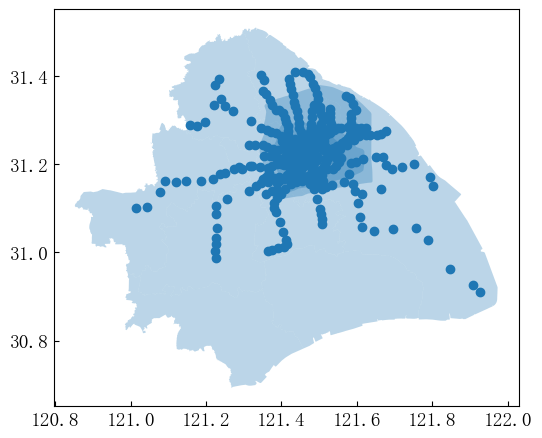

In [215]:
fig,ax=plt.subplots(figsize=(6,6),dpi=100)
sh.plot(ax=ax,alpha=0.3,linewidth=2)
nei.plot(ax=ax,alpha=0.3,linewidth=2)
zhong.plot(ax=ax,alpha=0.3,linewidth=2)
wai.plot(ax=ax,alpha=0.3,linewidth=2)
point.plot(ax=ax)

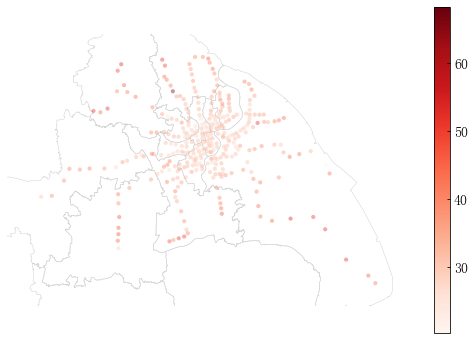

In [112]:
#使用 geoplot 中的 polyplot 来绘制纽约行政区划，这里使用 geoplot 自带的Albers等面积投影作为投影
ax=gplt.polyplot(df=sh,projection=gcrs.AlbersEqualArea(),edgecolor='lightgrey',linewidths=0.5,figsize=(9,6))
gplt.pointplot(df=point,ax=ax,s=4,linewidths=0.1,hue='time',cmap='Reds',alpha=0.4,legend=True)
# gplt.kdeplot(df=point,cmap='Reds',shade=True,shade_lowest=True,clip=sh,ax=ax)#核密度图
# plt.savefig(r'C:\Users\飘哥\Desktop\dd.png', bbox_inches='tight', pad_inches=0, dpi=300)

In [198]:
#https://jiffyclub.github.io/palettable/cmocean/sequential/#contents 选颜色import
from palettable.cmocean.sequential import Matter_15

C:\Anaconda\lib\site-packages\geoplot\geoplot.py:627: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  'Cannot set "figsize" when passing an "ax" to the plot. To remove this '
C:\Anaconda\lib\site-packages\geoplot\geoplot.py:258: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


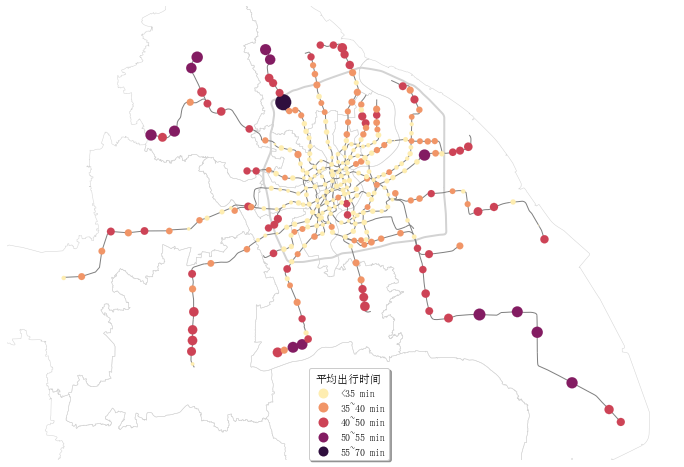

In [200]:
import mapclassify as mc
line=gpd.read_file(r'C:\Users\飘哥\Desktop\OD数据研究\图层\地铁线路.shp',encoding='utf-8')
line=line.to_crs('EPSG:4326')
ax=gplt.polyplot(df=sh,projection=gcrs.AlbersEqualArea(),edgecolor='lightgrey',linewidths=0.5,figsize=(12, 15))
gplt.polyplot(ax=ax,df=wai,projection=gcrs.AlbersEqualArea(),edgecolor='lightgrey',linewidths=2,figsize=(12, 15))
# scheme = mc.Quantiles(point['time'], k=4)#按照分位数原则分成五分
scheme = mc.UserDefined(point['time'], bins=[35,40,50,55])#按照自定义原则划分
gplt.polyplot(ax=ax,df=line,projection=gcrs.AlbersEqualArea(),edgecolor='grey',linewidths=1,figsize=(12, 15))
gplt.pointplot(df=point,hue='time',cmap=Matter_15.mpl_colormap,scheme=scheme,ax=ax,legend=True,linewidths=0.1,figsize=(12, 15),
# s=6,
scale='time',limits=(1, 16), # 以price作为尺寸映射列,设置散点的尺寸范围
legend_kwargs={'loc': (0.45,0), # 图例位置
'title': '平均出行时间', # 图例标题
'title_fontsize': 11, # 图例标题字体大小
'fontsize': 10, # 图例非标题外字体大小
'shadow': True,}# 添加图例阴影
,legend_labels=['<35 min','35~40 min','40~50 min','50~55 min','55~70 min'])
plt.savefig(r'C:\Users\飘哥\Desktop\平均出行时间.png', bbox_inches='tight', pad_inches=0, dpi=300)

In [256]:
point['range']=pd.cut(point.time,[0,35,40,50,55,70],labels=['0-35','35-40','40-50','50-55','55-70'])
station=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站点属性.csv',usecols=['name','cate','location'],encoding='gb2312')
point=pd.merge(point,station,on='name',how='left')
point

,name,time,lat,lng,geometry,range,cate,location
0,七宝,29.524507,31.157307,121.344973,POINT (121.34497 31.15731),0-35,混合型,郊区
1,七莘路,41.214519,31.133770,121.358530,POINT (121.35853 31.13377),40-50,混合型,郊区
2,三林,35.985449,31.145129,121.507225,POINT (121.50723 31.14513),35-40,居住型,中外环
3,三林东,38.813827,31.148613,121.518794,POINT (121.51879 31.14861),35-40,居住型,中外环
4,三门路,43.182437,31.315271,121.504041,POINT (121.50404 31.31527),40-50,混合型,中外环
...,...,...,...,...,...,...,...,...
315,龙柏新村,42.833472,31.179500,121.365743,POINT (121.36574 31.17950),40-50,混合型,中外环
316,龙溪路,29.158231,31.196275,121.375518,POINT (121.37552 31.19628),0-35,混合型,中外环
317,龙漕路,30.292479,31.171743,121.439443,POINT (121.43944 31.17174),0-35,混合型,中外环
318,龙耀路,33.463855,31.161737,121.455199,POINT (121.45520 31.16174),0-35,混合型,中外环


In [258]:
point.groupby('cate').mean()

,time,lat,lng
cate,,,
产业型,35.572627,31.208675,121.488368
其他型,35.137195,31.167479,121.424973
商服型,32.372749,31.221858,121.468367
居住型,38.408226,31.220854,121.447362
混合型,34.948112,31.218927,121.462216


In [249]:
zz=point.groupby('range').count()
zz['percent']=zz.name/320
zz

,name,time,lat,lng,geometry,percent
range,,,,,,
0-35,175,175,175,175,175,0.546875
35-40,74,74,74,74,74,0.231250
40-50,57,57,57,57,57,0.178125
50-55,13,13,13,13,13,0.040625
55-70,1,1,1,1,1,0.003125


## 不同站点进出站客流 

In [201]:
df=pd.read_csv(r'C:\Users\飘哥\Desktop\通勤数据\分析数据\6月5日OD.csv')
df

,hour,FSTR_ONAME,FSTR_DNAME,实际值,常态值,变化量,dist,time,Ocat,Oloc,Dcat,Dloc,rainvalue
0,6,七宝,上海南站,2,4.00,-2.00,15.373,43.133333,混合区,郊区,混合区,中外环,10.51
1,7,七宝,上海南站,12,9.75,2.25,15.373,43.133333,混合区,郊区,混合区,中外环,7.79
2,8,七宝,上海南站,15,12.25,2.75,15.373,43.133333,混合区,郊区,混合区,中外环,0.14
3,9,七宝,上海南站,8,3.00,5.00,15.373,43.133333,混合区,郊区,混合区,中外环,0.18
4,10,七宝,上海南站,1,5.92,-4.92,15.373,43.133333,混合区,郊区,混合区,中外环,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,20,真如,上南路,1,1.00,0.00,17.234,39.916667,混合区,中外环,居住区,中外环,0.00
545511,20,紫藤路,杨高北路,1,1.00,0.00,30.433,71.200000,混合区,中外环,居住区,中外环,0.00
545512,20,龙阳路,东川路,1,1.00,0.00,38.862,78.933333,混合区,中外环,混合区,郊区,0.00
545513,21,新闸路,李子园,1,1.00,0.00,11.345,35.200000,工作区,内环,混合区,中外环,0.00


## 方向平衡度计算 

In [217]:
#早高峰
data_in=df.query('hour==(7,8,9)').groupby('FSTR_ONAME').sum().reset_index()[['FSTR_ONAME','常态值']]
data_in.columns=['name','in']
data_out=df.query('hour==(7,8,9)').groupby('FSTR_DNAME').sum().reset_index()[['FSTR_DNAME','常态值']]
data_out.columns=['name','out']
data1=pd.merge(data_in,data_out,on='name',how='left')
data1['per']=data1['in']/data1['out']
data1

,name,in,out,per
0,七宝,5842.83,4783.95,1.221340
1,七莘路,4242.49,2311.18,1.835638
2,三林,4468.84,547.75,8.158539
3,三林东,4295.52,715.76,6.001341
4,三门路,921.27,1933.16,0.476562
...,...,...,...,...
315,龙柏新村,2546.26,2199.45,1.157680
316,龙溪路,1271.17,1106.57,1.148748
317,龙漕路,6716.25,4000.26,1.678953
318,龙耀路,1576.50,754.50,2.089463


In [202]:
#晚高峰
data_in=df.query('hour==(17,18,19)').groupby('FSTR_ONAME').sum().reset_index()[['FSTR_ONAME','常态值']]
data_in.columns=['name','in']
data_out=df.query('hour==(17,18,19)').groupby('FSTR_DNAME').sum().reset_index()[['FSTR_DNAME','常态值']]
data_out.columns=['name','out']
data1=pd.merge(data_in,data_out,on='name',how='left')
data1['per']=data1['in']/data1['out']
data1

,name,in,out,per
0,七宝,4233.92,6231.56,0.679432
1,七莘路,1897.07,2821.18,0.672438
2,三林,717.56,3156.71,0.227313
3,三林东,672.98,2878.30,0.233812
4,三门路,1398.66,667.23,2.096219
...,...,...,...,...
315,龙柏新村,1963.46,2497.33,0.786224
316,龙溪路,973.79,968.68,1.005275
317,龙漕路,3249.81,4837.55,0.671788
318,龙耀路,704.02,1053.25,0.668426


In [53]:
#常态客流
data1=df.query('hour==(17,18,19)').groupby('FSTR_ONAME').sum().reset_index()[['FSTR_ONAME','常态值']]
# data1=df.query('hour==(17,18,19)').groupby('FSTR_DNAME').sum().reset_index()[['FSTR_DNAME','常态值']]
data1.columns=['name','常态值']
data1

,name,常态值
0,七宝,4233.92
1,七莘路,1897.07
2,三林,717.56
3,三林东,672.98
4,三门路,1398.66
...,...,...
315,龙柏新村,1963.46
316,龙溪路,973.79
317,龙漕路,3249.81
318,龙耀路,704.02


In [218]:
#点数据
data2=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站经纬度.csv',encoding='gb2312',usecols=['name','lat','lng'])
data2.head()

,name,lat,lng
0,江杨北路,31.409674,121.435220
1,铁力路,31.409685,121.456757
2,美兰湖,31.403678,121.345334
3,友谊路,31.406039,121.471343
4,富锦路,31.394078,121.420009


In [204]:
import geopandas as gpd
from shapely.geometry import Point,LineString,Polygon
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
data2['geometry']=[Point(xy) for xy in zip(data2.lng,data2.lat)]
data2=gpd.GeoDataFrame(data2)
data2

,name,lat,lng,geometry
0,江杨北路,31.409674,121.435220,POINT (121.43522 31.40967)
1,铁力路,31.409685,121.456757,POINT (121.45676 31.40969)
2,美兰湖,31.403678,121.345334,POINT (121.34533 31.40368)
3,友谊路,31.406039,121.471343,POINT (121.47134 31.40604)
4,富锦路,31.394078,121.420009,POINT (121.42001 31.39408)
...,...,...,...,...
315,临港大道,30.925876,121.906772,POINT (121.90677 30.92588)
316,滴水湖,30.909291,121.925831,POINT (121.92583 30.90929)
317,野生动物园,31.052450,121.695519,POINT (121.69552 31.05245)
318,醉白池,31.003732,121.224626,POINT (121.22463 31.00373)


In [220]:
data3=pd.merge(data2,data1,on='name',how='left')
data3.set_crs('EPSG:4326',inplace=True)
data3['per']=data3.per.round(1)
data3

,name,lat,lng,geometry,in,out,per
0,江杨北路,31.409674,121.435220,POINT (121.43522 31.40967),2512.10,301.91,8.3
1,铁力路,31.409685,121.456757,POINT (121.45676 31.40969),377.07,427.75,0.9
2,美兰湖,31.403678,121.345334,POINT (121.34533 31.40368),4597.93,850.65,5.4
3,友谊路,31.406039,121.471343,POINT (121.47134 31.40604),1769.50,909.09,1.9
4,富锦路,31.394078,121.420009,POINT (121.42001 31.39408),6633.18,1078.92,6.1
...,...,...,...,...,...,...,...
315,临港大道,30.925876,121.906772,POINT (121.90677 30.92588),277.07,234.49,1.2
316,滴水湖,30.909291,121.925831,POINT (121.92583 30.90929),320.67,725.59,0.4
317,野生动物园,31.052450,121.695519,POINT (121.69552 31.05245),2129.86,468.93,4.5
318,醉白池,31.003732,121.224626,POINT (121.22463 31.00373),1229.18,388.69,3.2


In [223]:
data3.to_clipboard(excel=True,index=None)

In [57]:
data3.to_file(r'C:\Users\飘哥\Desktop\毕业论文\图层\晚高峰进站.shp',encoding='gb2312')

In [28]:
from palettable.cmocean.sequential import Deep_14
#cmap=Deep_14.mpl_colormap 这样设置参数

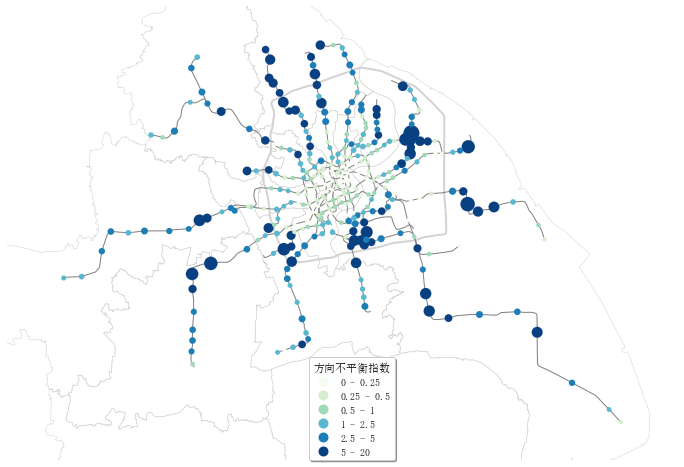

In [222]:
import mapclassify as mc
sh=gpd.read_file(r'C:\Users\飘哥\Desktop\上海行政区\SH_wgs.shp',encoding='utf-8')
wai=gpd.read_file(r'C:\Users\飘哥\Desktop\OD数据研究\图层\中心城区.shp',encoding='utf-8')
line=gpd.read_file(r'C:\Users\飘哥\Desktop\OD数据研究\图层\地铁线路.shp',encoding='utf-8')
sh=sh.to_crs('EPSG:4326')
wai=wai.to_crs('EPSG:4326')
line=line.to_crs('EPSG:4326')
ax=gplt.polyplot(df=sh,projection=gcrs.AlbersEqualArea(),edgecolor='lightgrey',linewidths=0.5,figsize=(12, 15))
gplt.polyplot(ax=ax,df=wai,projection=gcrs.AlbersEqualArea(),edgecolor='lightgrey',linewidths=2,figsize=(12, 15))
gplt.polyplot(ax=ax,df=line,projection=gcrs.AlbersEqualArea(),edgecolor='grey',linewidths=1,figsize=(12, 15))
# scheme = mc.Quantiles(data3['per'], k=5)#按照分位数原则分成五分
scheme = mc.UserDefined(data3['per'], bins=[0.25,0.5,1,2.5,5])#按照自定义原则划分

gplt.pointplot(df=data3,hue='per',cmap='GnBu',scheme=scheme,ax=ax,legend=True,linewidths=0.1,
# s=6
scale='per',limits=(4, 16), # 以price作为尺寸映射列,设置散点的尺寸范围
legend_kwargs={'loc': (0.45,0), # 图例位置
'title': '方向不平衡指数', # 图例标题
'title_fontsize': 11, # 图例标题字体大小
'fontsize': 10, # 图例非标题外字体大小
'shadow': True}# 添加图例阴影
,legend_labels=['0 - 0.25','0.25 - 0.5','0.5 - 1','1 - 2.5','2.5 - 5','5 - 20'])
plt.savefig(r'C:\Users\飘哥\Desktop\早高峰.png', bbox_inches='tight', pad_inches=0, dpi=300)

In [93]:

from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
from math import radians
from math import *

In [94]:
def getDegree(latA, lonA, latB, lonB):
    """
    Args:
        point p1(latA, lonA)
        point p2(latB, lonB)
    Returns:
        bearing between the two GPS points,
        default: the basis of heading direction is north
    """
    radLatA = radians(latA)
    radLonA = radians(lonA)
    radLatB = radians(latB)
    radLonB = radians(lonB)
    dLon = radLonB - radLonA
    y = sin(dLon) * cos(radLatB)
    x = cos(radLatA) * sin(radLatB) - sin(radLatA) * cos(radLatB) * cos(dLon)
    brng = degrees(atan2(y, x))
    brng = (brng + 360) % 360
    return brng


## 不同区域客流量分析 

In [122]:
df=pd.read_csv(r'C:\Users\飘哥\Desktop\通勤数据\分析数据\6月5日OD.csv')
station=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站点属性.csv',encoding='gb2312',usecols=['name','cate','loc','line'])
station.columns=['FSTR_ONAME','Occat','Sloc','Sline']
df=pd.merge(df,station,on='FSTR_ONAME',how='left')
station.columns=['FSTR_DNAME','Dccat','Eloc','Eline']
df=pd.merge(df,station,on='FSTR_DNAME',how='left')
df

,hour,FSTR_ONAME,FSTR_DNAME,实际值,常态值,变化量,dist,time,Ocat,Oloc,Dcat,Dloc,rainvalue,Occat,Sloc,Sline,Dccat,Eloc,Eline
0,6,七宝,上海南站,2,4.00,-2.00,15.373,43.133333,混合区,郊区,混合区,中外环,10.51,混合型,郊区,9,混合型,城区,1
1,7,七宝,上海南站,12,9.75,2.25,15.373,43.133333,混合区,郊区,混合区,中外环,7.79,混合型,郊区,9,混合型,城区,1
2,8,七宝,上海南站,15,12.25,2.75,15.373,43.133333,混合区,郊区,混合区,中外环,0.14,混合型,郊区,9,混合型,城区,1
3,9,七宝,上海南站,8,3.00,5.00,15.373,43.133333,混合区,郊区,混合区,中外环,0.18,混合型,郊区,9,混合型,城区,1
4,10,七宝,上海南站,1,5.92,-4.92,15.373,43.133333,混合区,郊区,混合区,中外环,2.46,混合型,郊区,9,混合型,城区,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,20,真如,上南路,1,1.00,0.00,17.234,39.916667,混合区,中外环,居住区,中外环,0.00,混合型,城区,11,居住型,城区,6
545511,20,紫藤路,杨高北路,1,1.00,0.00,30.433,71.200000,混合区,中外环,居住区,中外环,0.00,混合型,城区,10,居住型,城区,12
545512,20,龙阳路,东川路,1,1.00,0.00,38.862,78.933333,混合区,中外环,混合区,郊区,0.00,混合型,城区,2,混合型,郊区,5
545513,21,新闸路,李子园,1,1.00,0.00,11.345,35.200000,工作区,内环,混合区,中外环,0.00,商服型,城区,1,混合型,城区,11


In [134]:
zz=df.query('hour==(17,18,19)').groupby(['Sloc','Eloc']).sum()
zz['占比']=zz.常态值/756932
zz

hour     实际值        常态值      变化量        dist          time  \
Sloc Eloc                                                                  
城区   城区    1357292  466659  461926.48  4732.52  999499.875  2.671308e+06   
     郊区     486967  212165  212136.77    28.23  747934.232  1.492626e+06   
郊区   城区     271535   45038   46567.51 -1529.51  384607.703  7.900253e+05   
     郊区      82270   34452   36302.20 -1850.20  120745.417  2.200563e+05   

           rainvalue   Sline   Eline        占比  
Sloc Eloc                                       
城区   城区    241284.45  475504  476399  0.610262  
     郊区     85765.08  167868  243960  0.280259  
郊区   城区     50309.94  128968   88932  0.061521  
     郊区     14425.96   41425   42772  0.047960

In [133]:
zz.常态值.cumsum()

Sloc  Eloc
城区    城区      461926.48
      郊区      674063.25
郊区    城区      720630.76
      郊区      756932.96
Name: 常态值, dtype: float64

## 地铁全网络客流变化 

In [31]:
data=pd.read_clipboard()
data

,hour,实际值,常态值,变化量
0,6,105718,111902.04,-6184.04
1,7,319951,347168.11,-27217.11
2,8,423269,404043.71,19225.29
3,9,192173,177147.26,15025.74
4,10,81903,85344.68,-3441.68
5,11,73786,79011.16,-5225.16
6,12,84174,89490.93,-5316.93
7,13,81150,85476.59,-4326.59
8,14,85866,92122.69,-6256.69
9,15,105892,110107.83,-4215.83


In [36]:
data.query('hour==(10,11,12,13,14,15,16)').cumsum()

,hour,实际值,常态值,变化量
4,10,81903,85344.68,-3441.68
5,21,155689,164355.84,-8666.84
6,33,239863,253846.77,-13983.77
7,46,321013,339323.36,-18310.36
8,60,406879,431446.05,-24567.05
9,75,512771,541553.88,-28782.88
10,91,660248,693378.55,-33130.55


In [37]:
33130.55/693378.55

0.04778133099156298

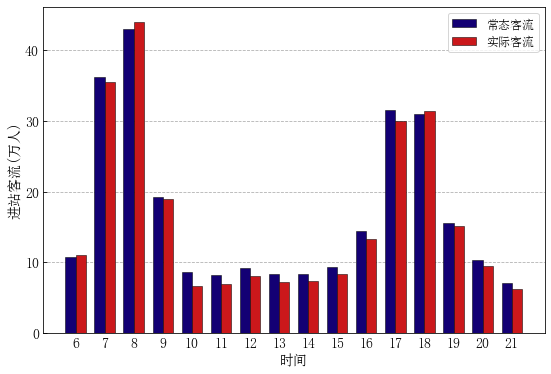

In [30]:

fig,ax=plt.subplots(figsize=(9,6))
plt.grid(axis='y',ls='--')
width=0.35
x=np.arange(6,22,1)
ax.bar(x-width/2,data.常态值/10000,width,label='常态客流',color='#130074',ec='black',lw=.5)
ax.bar(x+width/2,data.实际值/10000,width,label='实际客流',color='#CB181B',ec='black',lw=.5)
# bar_c = ax.bar(x+width*3/2, data_c,width,label='category_C',color='#008B45',ec='black',lw=.5)
ax.set_xticks(range(6,22,1))
plt.xlabel('时间')
plt.ylabel('进站客流(万人)')
plt.legend()
ax.tick_params(axis="x", bottom=False)#隐藏刻度线
# plt.legend(fontsize=10,frameon=False)
plt.legend(fontsize=12)

#设置a
# text_font = {'size':'14','weight':'bold','color':'black'}
# ax.text(.03,.93,"(a)",transform = ax.transAxes,fontdict=text_font,zorder=4)
#隐藏上右框线
# for spine in ['top','right']:
#     ax.spines[spine].set_color('none')

plt.savefig(r'C:\Users\飘哥\Desktop\全网络客流变化7月6日.png',dpi=300,bbox_inches='tight')

## 波动率和客流量象限分析

In [77]:
all_files=glob.glob(r'C:\Users\飘哥\Desktop\通勤数据\分析数据\*.csv')
all_files=all_files[0:1]
all_files

['C:\\Users\\飘哥\\Desktop\\通勤数据\\分析数据\\6月5日OD.csv']

In [78]:
all_dataframe=[]
for i in all_files:
    result=pd.read_csv(i)
    all_dataframe.append(result)
final=pd.concat(all_dataframe,0)
final=final.reset_index(drop=True)
final

,hour,FSTR_ONAME,FSTR_DNAME,实际值,常态值,变化量,dist,time,Ocat,Oloc,Dcat,Dloc,rainvalue
0,6,七宝,上海南站,2,4.00,-2.00,15.373,43.133333,混合区,郊区,混合区,中外环,10.51
1,7,七宝,上海南站,12,9.75,2.25,15.373,43.133333,混合区,郊区,混合区,中外环,7.79
2,8,七宝,上海南站,15,12.25,2.75,15.373,43.133333,混合区,郊区,混合区,中外环,0.14
3,9,七宝,上海南站,8,3.00,5.00,15.373,43.133333,混合区,郊区,混合区,中外环,0.18
4,10,七宝,上海南站,1,5.92,-4.92,15.373,43.133333,混合区,郊区,混合区,中外环,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,20,真如,上南路,1,1.00,0.00,17.234,39.916667,混合区,中外环,居住区,中外环,0.00
545511,20,紫藤路,杨高北路,1,1.00,0.00,30.433,71.200000,混合区,中外环,居住区,中外环,0.00
545512,20,龙阳路,东川路,1,1.00,0.00,38.862,78.933333,混合区,中外环,混合区,郊区,0.00
545513,21,新闸路,李子园,1,1.00,0.00,11.345,35.200000,工作区,内环,混合区,中外环,0.00


In [163]:
df=final.query('hour==18').groupby('FSTR_ONAME').agg(常态值=('常态值',np.sum),实际值=('实际值',np.sum),变化量=('变化量',np.sum),rain=('rainvalue',np.mean)).reset_index()
df['change']=df.变化量/df.常态值
df

,FSTR_ONAME,常态值,实际值,变化量,rain,change
0,七宝,1713.17,1654,-59.17,1.96,-0.034538
1,七莘路,800.57,811,10.43,2.28,0.013028
2,三林,225.32,211,-14.32,2.59,-0.063554
3,三林东,210.33,196,-14.33,2.56,-0.068131
4,三门路,518.92,523,4.08,2.58,0.007862
...,...,...,...,...,...,...
315,龙柏新村,775.49,824,48.51,2.16,0.062554
316,龙溪路,407.70,336,-71.70,2.22,-0.175865
317,龙漕路,1408.66,1389,-19.66,2.86,-0.013957
318,龙耀路,250.60,254,3.40,2.86,0.013567


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


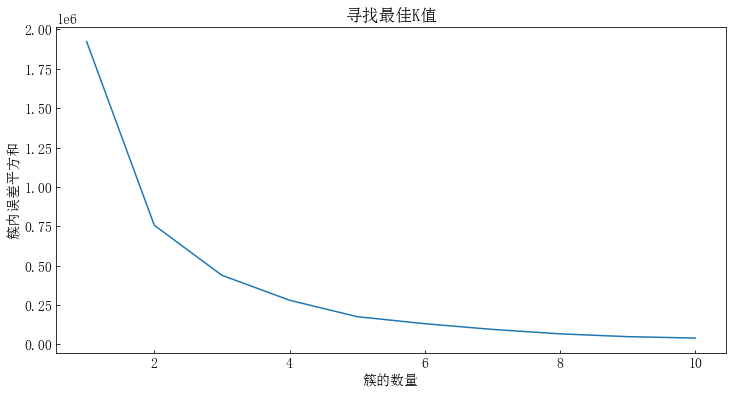

In [164]:
from sklearn.cluster import KMeans
## 寻找最佳K值
x1 = df[['变化量','change']].values
inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x1)
    inertia.append(km.inertia_)  #簇内的误差平方和
plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertia)

plt.title("寻找最佳K值")
plt.xlabel('簇的数量')
plt.ylabel('簇内误差平方和')
plt.show()

In [165]:
km = KMeans(n_clusters=3)
y_means = km.fit_predict(x1)
y_means

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,

In [166]:
df['labels']=km.labels_
df

,FSTR_ONAME,常态值,实际值,变化量,rain,change,labels
0,七宝,1713.17,1654,-59.17,1.96,-0.034538,0
1,七莘路,800.57,811,10.43,2.28,0.013028,0
2,三林,225.32,211,-14.32,2.59,-0.063554,0
3,三林东,210.33,196,-14.33,2.56,-0.068131,0
4,三门路,518.92,523,4.08,2.58,0.007862,0
...,...,...,...,...,...,...,...
315,龙柏新村,775.49,824,48.51,2.16,0.062554,2
316,龙溪路,407.70,336,-71.70,2.22,-0.175865,0
317,龙漕路,1408.66,1389,-19.66,2.86,-0.013957,0
318,龙耀路,250.60,254,3.40,2.86,0.013567,0


In [167]:
station=pd.read_csv(r'C:\Users\飘哥\Desktop\地铁站点属性.csv',encoding='gb2312',usecols=['name','cate'])
station.columns=['FSTR_ONAME','cate']
df=pd.merge(df,station,on='FSTR_ONAME',how='left')
df

,FSTR_ONAME,常态值,实际值,变化量,rain,change,labels,cate
0,七宝,1713.17,1654,-59.17,1.96,-0.034538,0,混合型
1,七莘路,800.57,811,10.43,2.28,0.013028,0,混合型
2,三林,225.32,211,-14.32,2.59,-0.063554,0,居住型
3,三林东,210.33,196,-14.33,2.56,-0.068131,0,居住型
4,三门路,518.92,523,4.08,2.58,0.007862,0,混合型
...,...,...,...,...,...,...,...,...
315,龙柏新村,775.49,824,48.51,2.16,0.062554,2,混合型
316,龙溪路,407.70,336,-71.70,2.22,-0.175865,0,混合型
317,龙漕路,1408.66,1389,-19.66,2.86,-0.013957,0,混合型
318,龙耀路,250.60,254,3.40,2.86,0.013567,0,混合型


In [128]:
df.to_clipboard(excel=True)

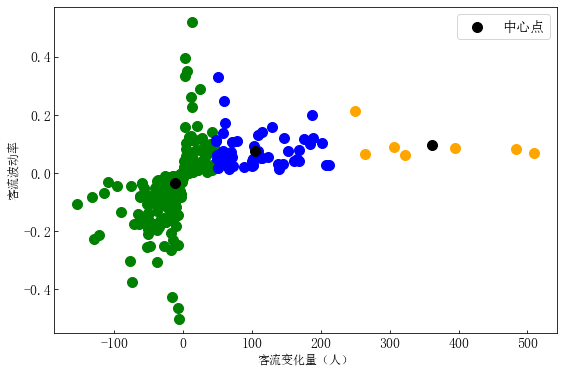

In [168]:
plt.figure(figsize=(9,6))
plt.scatter(x1[y_means==0,0],x1[y_means==0,1],s=100,color='green' )
plt.scatter(x1[y_means==1,0],x1[y_means==1,1],s=100,color='orange' )
plt.scatter(x1[y_means==2,0],x1[y_means==2,1],s=100,color='blue' )
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='black', label='中心点')
plt.xlabel('客流变化量（人）',fontsize=12)
plt.ylabel('客流波动率',fontsize=12)
ax.tick_params(labelsize=12)
plt.legend()
plt.savefig(r'C:\Users\飘哥\Desktop\聚类结果晚高峰.png',dpi=300)


In [134]:
zz=pd.read_clipboard()
zz

,FSTR_ONAME,常态值,实际值,变化量,rain,change,labels,cate
0,世纪大道,2473.18,2749,275.82,1.96,0.111524,1,商服型
1,娄山关路,1976.26,2171,194.74,0.44,0.098540,1,商服型
2,江苏路,1991.42,2153,161.58,0.42,0.081138,1,商服型
3,曹路,3149.42,3697,547.58,8.79,0.173867,1,居住型
4,九亭,6726.82,7155,428.18,0.10,0.063653,1,居住型
5,通河新村,4075.75,4435,359.25,3.23,0.088143,1,居住型
6,芦恒路,3881.40,4230,348.60,0.45,0.089813,1,居住型
7,泗泾,8761.56,9081,319.44,0.12,0.036459,1,居住型
8,彭浦新村,4115.09,4383,267.91,2.62,0.065104,1,居住型
9,市光路,1965.49,2218,252.51,4.78,0.128472,1,居住型


In [135]:
zz.groupby('cate')['FSTR_ONAME'].apply(lambda x:list(x)).reset_index().to_clipboard(excel=True)

##  计算断面流量

In [38]:
import pandas as pd
import numpy as np
import requests
import re
import json
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point,Polygon,shape
from shapely.ops import split
import glob

In [39]:
all_files=glob.glob(r'C:\Users\飘哥\Desktop\通勤数据\分析数据\*.csv')
all_files=all_files[0:1]
all_files

['C:\\Users\\飘哥\\Desktop\\通勤数据\\分析数据\\6月5日OD.csv']

In [40]:
all_dataframe=[]
for i in all_files:
    result=pd.read_csv(i)
    all_dataframe.append(result)
final=pd.concat(all_dataframe,0)
final=final.reset_index(drop=True)
final

,hour,FSTR_ONAME,FSTR_DNAME,实际值,常态值,变化量,dist,time,Ocat,Oloc,Dcat,Dloc,rainvalue
0,6,七宝,上海南站,2,4.00,-2.00,15.373,43.133333,混合区,郊区,混合区,中外环,10.51
1,7,七宝,上海南站,12,9.75,2.25,15.373,43.133333,混合区,郊区,混合区,中外环,7.79
2,8,七宝,上海南站,15,12.25,2.75,15.373,43.133333,混合区,郊区,混合区,中外环,0.14
3,9,七宝,上海南站,8,3.00,5.00,15.373,43.133333,混合区,郊区,混合区,中外环,0.18
4,10,七宝,上海南站,1,5.92,-4.92,15.373,43.133333,混合区,郊区,混合区,中外环,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,20,真如,上南路,1,1.00,0.00,17.234,39.916667,混合区,中外环,居住区,中外环,0.00
545511,20,紫藤路,杨高北路,1,1.00,0.00,30.433,71.200000,混合区,中外环,居住区,中外环,0.00
545512,20,龙阳路,东川路,1,1.00,0.00,38.862,78.933333,混合区,中外环,混合区,郊区,0.00
545513,21,新闸路,李子园,1,1.00,0.00,11.345,35.200000,工作区,内环,混合区,中外环,0.00


In [45]:
#读取OD停靠点数据,没有重复
df=gpd.read_feather(r'C:\Users\飘哥\Desktop\OD图形爬取\OD停靠点.feather')
df

,FSTR_ONAME,FSTR_DNAME,station_a,station_b,geometry
0,七宝,漕宝路,七宝,星中路,"LINESTRING (121.34576 31.15742, 121.36360 31.1..."
1,七宝,漕宝路,星中路,合川路,"LINESTRING (121.36510 31.16044, 121.37934 31.1..."
2,七宝,漕宝路,合川路,漕河泾开发区,"LINESTRING (121.38081 31.16860, 121.39239 31.1..."
3,七宝,漕宝路,漕河泾开发区,桂林路,"LINESTRING (121.39394 31.17252, 121.41310 31.1..."
4,七宝,漕宝路,桂林路,宜山路,"LINESTRING (121.41437 31.17739, 121.42210 31.1..."
...,...,...,...,...,...
760764,龙阳路,金运路,大渡河路,真北路,"LINESTRING (121.38923 31.23363, 121.37806 31.2..."
760765,龙阳路,金运路,真北路,祁连山南路,"LINESTRING (121.37651 31.23440, 121.36346 31.2..."
760766,龙阳路,金运路,祁连山南路,丰庄,"LINESTRING (121.36197 31.23968, 121.35143 31.2..."
760767,龙阳路,金运路,丰庄,金沙江西路,"LINESTRING (121.34990 31.24430, 121.33083 31.2..."


In [63]:
#读取属性数据
data=final.query('hour==8').reset_index(drop=True)
data=data[['FSTR_ONAME','FSTR_DNAME','实际值','常态值','变化量']]
#同一OD名合并,这里将四天OD求平均了
# data2=data.groupby(['FSTR_ONAME','FSTR_DNAME']).sum().reset_index()
data2=data.groupby(['FSTR_ONAME','FSTR_DNAME']).mean().reset_index()
data2

,FSTR_ONAME,FSTR_DNAME,实际值,常态值,变化量
0,七宝,三林东,1,1.00,0.00
1,七宝,三门路,3,6.00,-3.00
2,七宝,上南路,1,1.00,0.00
3,七宝,上海体育场,19,12.25,6.75
4,七宝,上海体育馆,8,10.25,-2.25
...,...,...,...,...,...
45155,龙阳路,黄兴路,1,1.00,0.00
45156,龙阳路,黄陂南路,13,15.00,-2.00
45157,龙阳路,龙华中路,30,38.00,-8.00
45158,龙阳路,龙柏新村,4,0.75,3.25


In [68]:
#属性匹配
data3=pd.merge(df,data2,on=['FSTR_ONAME','FSTR_DNAME'],how='left')
data3=data3.dropna().reset_index(drop=True)
#得到每一条线段的变化量
splited_lines=data3.groupby(['station_a','station_b']).sum().reset_index()
#线段geometry属性
od_geo=gpd.read_file(r'C:\Users\飘哥\Desktop\OD图形爬取\od线段底图.shp',encoding='utf-8')
#匹配geometry属性
splited_lines=pd.merge(splited_lines,od_geo,on=['station_a','station_b'],how='left').dropna()
splited_lines

,station_a,station_b,实际值,常态值,变化量,geometry
0,七宝,中春路,2172.0,2177.86,-5.86,"LINESTRING (121.34426 31.15695, 121.33379 31.1..."
1,七宝,星中路,27261.0,26134.64,1126.36,"LINESTRING (121.34576 31.15742, 121.36360 31.1..."
2,七莘路,虹莘路,2040.0,1874.00,166.00,"LINESTRING (121.35929 31.13402, 121.37478 31.1..."
3,三林,三林东,1683.0,1630.11,52.89,"LINESTRING (121.50799 31.14536, 121.51803 31.1..."
4,三林,东方体育中心,8697.0,8280.64,416.36,"LINESTRING (121.50647 31.14538, 121.47686 31.1..."
...,...,...,...,...,...,...
830,龙阳路,世纪公园,15833.0,15407.84,425.16,"LINESTRING (121.55271 31.20555, 121.54725 31.2..."
831,龙阳路,华夏中路,1002.0,953.93,48.07,"LINESTRING (121.55381 31.20439, 121.57760 31.1..."
832,龙阳路,张江高科,10942.0,10435.80,506.20,"LINESTRING (121.55407 31.20496, 121.58275 31.2..."
833,龙阳路,花木路,1065.0,997.25,67.75,"LINESTRING (121.55368 31.20568, 121.55771 31.2..."


In [69]:
splited_lines.query('station_a=="七宝" and station_b=="中春路"')

,station_a,station_b,实际值,常态值,变化量,geometry
0,七宝,中春路,2172.0,2177.86,-5.86,"LINESTRING (121.34426 31.15695, 121.33379 31.1..."


In [70]:
splited_lines.query('station_a=="中春路" and station_b=="七宝"')

,station_a,station_b,实际值,常态值,变化量,geometry
104,中春路,七宝,26218.0,25188.31,1029.69,"LINESTRING (121.33379 31.15174, 121.34426 31.1..."


In [71]:
25188.31/2177.86

11.56562405296943

In [72]:
26218.0/2172.0

12.070902394106813

<AxesSubplot:>

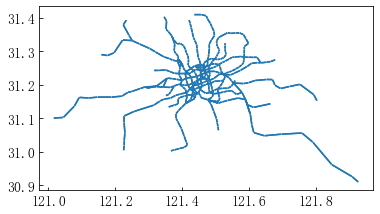

In [56]:
splited_lines.plot()